In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
from datetime import date
# import request
import io
import matplotlib.pyplot as plt
# import seaborn as sns
import matplotlib.pylab as rcparam

In [2]:
from pandas_datareader.data import DataReader

In [3]:
ticker = 'TSLA'
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2022,8,31)

In [4]:
stocks = pd.DataFrame()
stock = []
stock = yf.download(ticker,start = start,end = end,progress=False)
stocks = stocks.append(stock,sort=False)

/var/folders/ck/357lw4vn3zv9tsh9pl19_ycw0000gn/T/ipykernel_2548/3972171795.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stocks = stocks.append(stock,sort=False)


In [5]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,14.872667,15.045333,14.816667,14.827333,14.827333,34462500
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000


In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1930 entries, 2014-12-31 to 2022-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1930 non-null   float64
 1   High       1930 non-null   float64
 2   Low        1930 non-null   float64
 3   Close      1930 non-null   float64
 4   Adj Close  1930 non-null   float64
 5   Volume     1930 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 105.5 KB


In [7]:
print("Maximum price from 2015 =>" ,stocks['Close'].max())

Maximum price from 2015 => 409.9700012207031


In [8]:
print("Minimum price from 2015 =>" ,stocks['Close'].min())

Minimum price from 2015 => 9.57800006866455


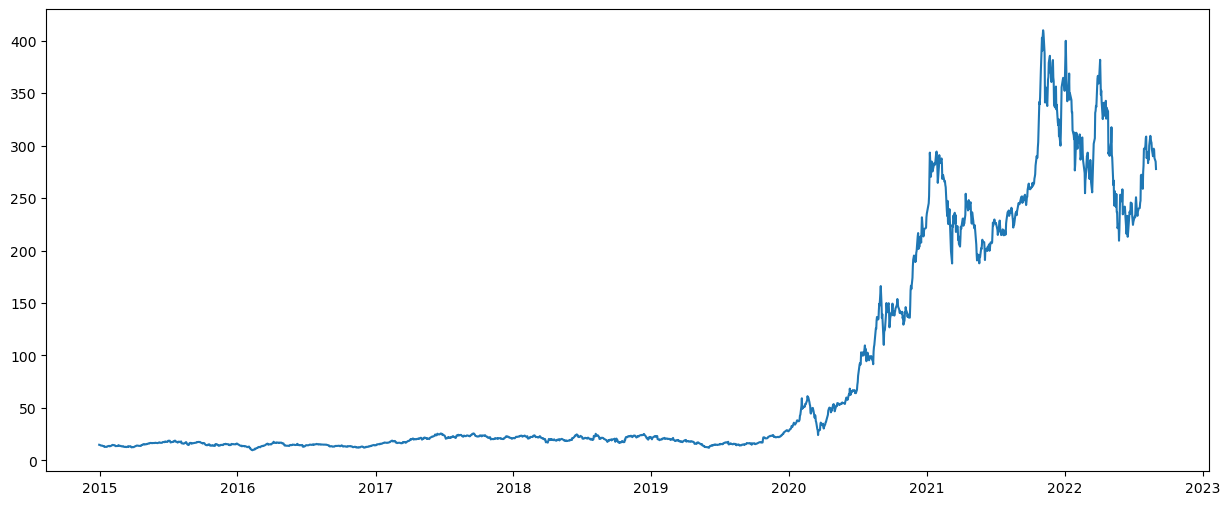

In [9]:
plt.figure(figsize=(15,6))
plt.plot(stock['Close'])

In [10]:
ma_day = [10,30,60]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    stocks1 = stocks
    stocks1[column_name] = stock['Close'].rolling(ma).mean()

In [11]:
stocks1.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 30 days,MA for 60 days
Date,,,,,,,,,
2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800,298.954001,283.192889,259.248445
2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000,299.898001,285.118112,259.970390
2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,56905800,298.704001,286.718889,260.658723
2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700,296.254001,288.194668,261.100167
2022-08-30,287.869995,288.480011,272.649994,277.700012,277.700012,50397900,293.367670,289.267001,261.819890


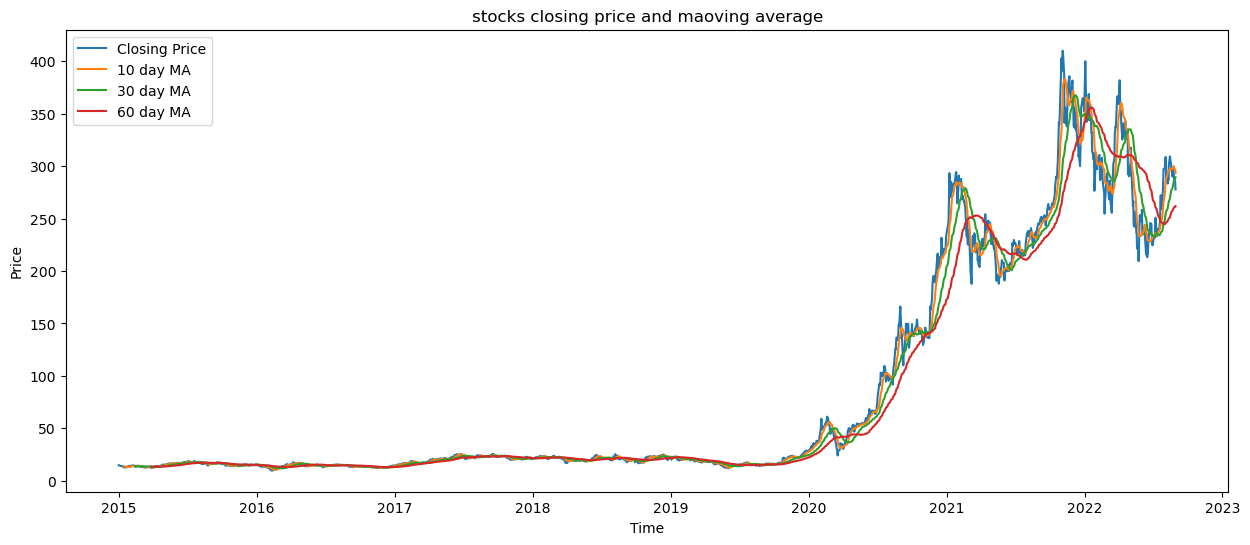

In [12]:
plt.figure(figsize=(15,6))
plt.plot(stocks1['Close'],label='Closing Price')
plt.plot(stocks1['MA for 10 days'],label='10 day MA')
plt.plot(stocks1['MA for 30 days'],label='30 day MA')
plt.plot(stocks1['MA for 60 days'],label='60 day MA')
plt.title("stocks closing price and maoving average")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
data = stocks1.filter(['Close'])

In [14]:
dataset = data.values

In [15]:
dataset

array([[ 14.82733345],
       [ 14.62066746],
       [ 14.00599957],
       ...,
       [288.08999634],
       [284.82000732],
       [277.70001221]])

In [16]:
training_data_len = int(np.ceil(len(dataset)*.95))

In [17]:
training_data_len

1834

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [19]:
train_data = scaled_data[0:int(training_data_len)]

In [20]:
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01311049, 0.01259433, 0.01105916, 0.0112573 , 0.01120235,
       0.01114741, 0.01048805, 0.00974712, 0.01008678, 0.008162  ,
       0.00802547, 0.00822527, 0.00803546, 0.00880803, 0.00964888,
       0.00959393, 0.01046974, 0.01037483, 0.00927424, 0.01024496,
       0.00997855, 0.01120069, 0.01243614, 0.01246778, 0.01287405,
       0.01226964, 0.01228962, 0.01209148, 0.01151039, 0.00985867,
       0.01000686, 0.01010343, 0.01012175, 0.0113289 , 0.01222802,
       0.01060128, 0.01006347, 0.01000519, 0.0105763 , 0.00993526,
       0.00893458, 0.00930588, 0.00978541, 0.00948404, 0.00836014,
       0.00786063, 0.00776739, 0.00833683, 0.00789227, 0.00749432,
       0.00866318, 0.00850167, 0.00949736, 0.00865485, 0.00905945,
       0.00931754, 0.00966553, 0.00843007, 0.00778237, 0.00688159])]
[0.0078090146998661125]

[array([0.01311049, 0.01259433, 0.01105916, 0.0112573 , 0.01120235,
       0.01114741, 0.01048805, 0.00974712, 0.01008678, 0.008162  ,
       0.00802547, 0.00822527, 0.

In [21]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [22]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [23]:
x_train.shape

(1774, 60, 1)

In [24]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [25]:
model = Sequential()

Metal device set to: Apple M1


2022-08-31 17:06:15.410110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-31 17:06:15.410205: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2022-08-31 17:06:15.723241: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-31 17:06:16.705219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-31 17:06:16.856693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-31 17:06:16.950745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-31 17:06:17.056333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


   1/1774 [..............................] - ETA: 48:11 - loss: 2.2883e-04

2022-08-31 17:06:17.214848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1774/1774 [==============================] - 49s 27ms/step - loss: 0.0022


In [29]:
test_data = scaled_data[training_data_len-60:,:]

In [30]:
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [31]:
x_test = np.array(x_test)

In [32]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [33]:
predictions = model.predict(x_test)

2022-08-31 17:07:04.646485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-31 17:07:04.711010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-31 17:07:04.805014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 18ms/step


In [34]:
predictions = scaler.inverse_transform(predictions)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
r2_score(y_test,predictions)

-0.632558297397291

In [37]:
mean_squared_error(y_test,predictions)

1996.4355374401468